In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
import DataHelper

e = DataHelper.eclass_data()

In [214]:
print('total number of pre responses:',e.get_buffy_pre().shape[0]+ + e.get_intro_pre().shape[0])
print('total number of post responses:', e.get_buffy_post().shape[0] + e.get_intro_post().shape[0])

print('total number of unique student IDs pre:', e.pre.anon_student_id.unique().shape)
print('total number of unique student IDs post:', e.post.anon_student_id.unique().shape)

print('total number of responses:', e.pre.shape[0] + e.post.shape[0])

total number of pre responses: 39505
total number of post responses: 31093
total number of unique student IDs pre: (35249,)
total number of unique student IDs post: (28222,)
total number of responses: 70598


# Figure 1 : Cumulative number of student responses to ECLASS

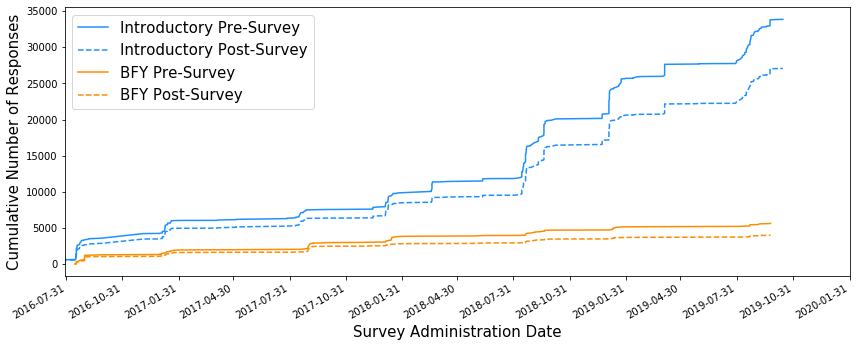

In [133]:
fig, ax = plt.subplots(figsize=(12, 5), sharex=True)

e.get_intro_pre().merge(e.get_cis_intro(), on='ResponseId').sort_values('StartDate').groupby('StartDate').count().anon_student_id.cumsum().plot(ax=ax, color='dodgerblue')

e.get_intro_post().merge(e.get_cis_intro(), on='ResponseId').sort_values('StartDate').groupby('StartDate').count().anon_student_id.cumsum().plot(ax=ax, color='dodgerblue', linestyle='--')

e.get_buffy_pre().merge(e.get_cis_buffy(), on='ResponseId').sort_values('StartDate').groupby('StartDate').count().anon_student_id.cumsum().plot(ax=ax, color='darkorange')

e.get_buffy_post().merge(e.get_cis_buffy(), on='ResponseId').sort_values('StartDate').groupby('StartDate').count().anon_student_id.cumsum().plot(ax=ax, color='darkorange', linestyle='--')

ax.set_xlabel('Survey Administration Date', fontsize=15)
ax.legend(['Introductory Pre-Survey', 'Introductory Post-Survey', 'BFY Pre-Survey', 'BFY Post-Survey'], fontsize=15)

ax.set_ylabel('Cumulative Number of Responses', rotation='vertical', fontsize=15)

e.get_cis()['StartDate'].min()
e.get_cis()['StartDate'].max()

xlabels = pd.date_range(e.get_cis()['StartDate'].min(), e.get_cis()['StartDate'].max(), freq='3M')

ax.set_xticks(xlabels,)
# ax.set_xticklabels(xlabels, rotation=0)

# ax.set_yscale('log')
# ax.set_ylim(1e0, 7e4)

fig.tight_layout()
fig.savefig('cum_responses.pdf')

# Table 1: Summary statistics describing differences in responses between intro and bfy

204

In [183]:
print('Number of courses survey offered as intro:', e.get_cis_intro().shape)
print('Number of courses survey offered as bfy:', e.get_cis_buffy().shape)

print('Number of unique universities offering intro:', e.get_cis_intro().anon_university_id.nunique())
print('Number of unique universities offering bfy:', e.get_cis_buffy().anon_university_id.nunique())
print('Number of unique universities:', e.get_cis().anon_university_id.nunique())

print('Number of unique instructors offering intro:', e.get_cis_intro().anon_instructor_id.nunique())
print('Number of unique instructors offering bfy:', e.get_cis_buffy().anon_instructor_id.nunique())
print('total unique instructors:', e.get_cis().anon_instructor_id.nunique())

print('Number of unique students in intro pre-responses:', e.get_intro_pre(unique_students=True).shape)
print('Number of unique students in intro post-responses:', e.get_intro_post(unique_students=True).shape)

print('Number of unique students in bfy pre-responses:', e.get_buffy_pre(unique_students=True).shape)
print('Number of unique students in bfy post-responses:', e.get_buffy_post(unique_students=True).shape)

print('Number of matched responses intro:', e.get_intro_matched().shape)
print('Number of matched responses bfy:', e.get_buffy_matched().shape)

Number of courses survey offered as intro: (363, 49)
Number of courses survey offered as bfy: (236, 49)
Number of unique universities offering intro: 88
Number of unique universities offering bfy: 70
Number of unique universities: 133
Number of unique instructors offering intro: 123
Number of unique instructors offering bfy: 103
total unique instructors: 204
Number of unique students in intro pre-responses: (30067, 66)
Number of unique students in intro post-responses: (24465, 111)
Number of unique students in bfy pre-responses: (5313, 66)
Number of unique students in bfy post-responses: (3817, 111)
Number of matched responses intro: (19445, 175)
Number of matched responses bfy: (3096, 175)


# Table 2: Demographic responses for ECLASS data set
## Gender

In [189]:
 e.get_intro_post().shape

(27087, 111)

In [93]:
print('unmatched')
print('intro gender:\n', e.get_intro_post().groupby('Q54').count().anon_student_id, '\nnot reported:\n', e.get_intro_post().isnull().sum(axis = 0).Q54)

print('bfy gender:\n', e.get_buffy_post().groupby('Q54').count().anon_student_id, '\nnot reported:\n', e.get_buffy_post().isnull().sum(axis = 0).Q54)

print('matched')
print('intro gender:\n', e.get_intro_matched().groupby('Q54').count().anon_student_id, '\nnot reported:\n', e.get_intro_matched().isnull().sum(axis = 0).Q54)

print('bfy gender:\n', e.get_buffy_matched().groupby('Q54').count().anon_student_id, '\nnot reported:\n', e.get_buffy_matched().isnull().sum(axis = 0).Q54)

unmatched
intro gender:
 Q54
1.0    11485
2.0    14741
3.0      253
Name: anon_student_id, dtype: int64 
not reported:
 608
bfy gender:
 Q54
1.0    1249
2.0    2595
3.0      62
Name: anon_student_id, dtype: int64 
not reported:
 100
matched
intro gender:
 Q54
1.0     8240
2.0    10568
3.0      197
Name: anon_student_id, dtype: int64 
not reported:
 440
bfy gender:
 Q54
1.0     899
2.0    2067
3.0      52
Name: anon_student_id, dtype: int64 
not reported:
 78


## Race

In [207]:
race_df = e.get_intro_post().copy()
race_df['multirace'] = race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']].sum(axis=1)
race_df['multirace'] = race_df.multirace.apply(lambda x: 1 if x > 1 else 0)
race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']]

questions = ['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']

race_df.loc[race_df.multirace==1, questions] = np.nan

print('unmatched')
print('intro race:')
print(race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']].sum())

In [208]:
race_df = e.get_intro_matched().copy()
race_df['multirace'] = race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']].sum(axis=1)
race_df['multirace'] = race_df.multirace.apply(lambda x: 1 if x > 1 else 0)
race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']]

questions = ['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']

race_df.loc[race_df.multirace==1, questions] = np.nan

print('matched')
print('intro race:')
print(race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']].sum())

matched
intro race:
Q52_1             40.0
Q52_2           4106.0
Q52_3           1002.0
Q52_4           1260.0
Q52_5             57.0
Q52_6           9889.0
Q52_7            379.0
race_unknown    1248.0
multirace       1464.0
dtype: float64


In [210]:
race_df = e.get_buffy_post().copy()
race_df['multirace'] = race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']].sum(axis=1)
race_df['multirace'] = race_df.multirace.apply(lambda x: 1 if x > 1 else 0)
race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']]

questions = ['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']

race_df.loc[race_df.multirace==1, questions] = np.nan

print('matched')
print('intro race:')
print(race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']].sum())

matched
intro race:
Q52_1              8.0
Q52_2            782.0
Q52_3             93.0
Q52_4            176.0
Q52_5              5.0
Q52_6           2314.0
Q52_7            119.0
race_unknown     279.0
multirace        230.0
dtype: float64


In [211]:
race_df = e.get_buffy_matched().copy()
race_df['multirace'] = race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']].sum(axis=1)
race_df['multirace'] = race_df.multirace.apply(lambda x: 1 if x > 1 else 0)
race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']]

questions = ['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown']

race_df.loc[race_df.multirace==1, questions] = np.nan

print('matched')
print('intro race:')
print(race_df[['Q52_1','Q52_2','Q52_3','Q52_4','Q52_5','Q52_6','Q52_7','race_unknown', 'multirace']].sum())

matched
intro race:
Q52_1              5.0
Q52_2            652.0
Q52_3             64.0
Q52_4            127.0
Q52_5              2.0
Q52_6           1776.0
Q52_7             88.0
race_unknown     217.0
multirace        165.0
dtype: float64


## majors

In [168]:
pd.DataFrame(
    {
        'intro major unmatched':e.get_intro_post(unique_students=True).groupby('Q47').count().anon_student_id
        ,'intro major matched':e.get_intro_matched(unique_students=True).groupby('Q47').count().anon_student_id
        ,'BFY major unmatched':e.get_buffy_post(unique_students=True).groupby('Q47').count().anon_student_id
        ,'BFY major matched':e.get_buffy_matched(unique_students=True).groupby('Q47').count().anon_student_id
    }
)

,intro major unmatched,intro major matched,BFY major unmatched,BFY major matched
Q47,,,,
0.0,5,3,3,2
1.0,1089,782,1769,1420
2.0,786,518,39,24
3.0,937,669,15,5
4.0,3614,2105,252,114
5.0,7324,5177,808,646
6.0,196,145,315,250
7.0,90,69,8,7
8.0,215,175,88,71


# Figure 2: plot comparing matched rates per survey

/home/john/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/john/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


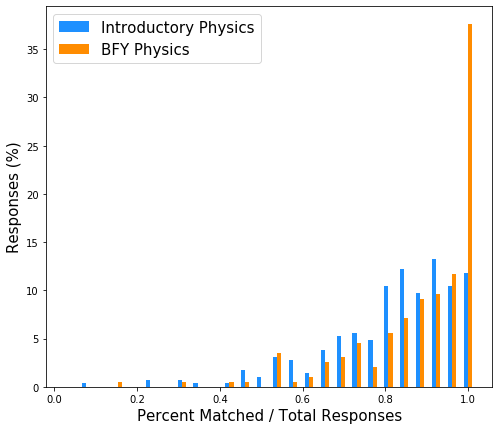

In [153]:
percent_matched = pd.DataFrame(
    {
        'intro preresponses': e.get_intro_pre(unique_students=True).groupby('ResponseId').count().anon_student_id
        ,'intro matched responses': e.get_intro_pre(unique_students=True).merge(e.get_intro_post(unique_students=True), how='outer', on=['anon_student_id', 'ResponseId',]).groupby('ResponseId').count().anon_student_id
        ,'bfy preresponses': e.get_buffy_pre(unique_students=True).groupby('ResponseId').count().anon_student_id
        ,'bfy matched responses': e.get_buffy_pre(unique_students=True).merge(e.get_buffy_post(unique_students=True), how='outer', on=['anon_student_id', 'ResponseId',]).groupby('ResponseId').count().anon_student_id
    }
)
percent_matched['intro percent'] = percent_matched['intro preresponses'] / percent_matched['intro matched responses']
percent_matched['bfy percent'] = percent_matched['bfy preresponses'] / percent_matched['bfy matched responses']

fig, ax = plt.subplots(figsize=(8, 7))

offset = 0.005
width = 0.01

h, edges = np.histogram(percent_matched['intro percent'], bins=26, range=(0, 1), density=False)
h = h/h.sum() * 100
ax.bar(x=edges[1:]-offset, height=h, width=width, color='dodgerblue', linewidth=3, label='Introductory Physics')

h, edges = np.histogram(percent_matched['bfy percent'], bins=26, range=(0, 1), density=False)
h = h/h.sum() * 100
ax.bar(x=edges[1:]+offset, height=h, width=width, color='darkorange', linewidth=3, label='BFY Physics')

ax.set_xlabel('Percent Matched / Total Responses', fontsize=15)
ax.set_ylabel('Responses (%)', fontsize=15)
ax.legend(fontsize=15)

fig.savefig('percentmatched.pdf', bbox_inches='tight')

# Table 3: Institutional descriptors table

In [175]:
e.get_cis_intro().groupby('Q15').mean()[['Q22_1', 'Q23', 'Q41']].transpose()

Q15,2 year college,4 year college,Master's granting institution,PhD granting institution
Q22_1,2.566667,2.824,3.159091,2.477641
Q23,0.233333,0.415,0.909091,0.060976
Q41,9.533333,9.280,10.409091,8.902439


In [176]:
e.get_cis_intro().groupby('Q15').std()[['Q22_1', 'Q23', 'Q41']].transpose()

Q15,2 year college,4 year college,Master's granting institution,PhD granting institution
Q22_1,0.651007,0.921303,1.264312,0.789489
Q23,0.416905,0.804341,3.190896,0.240758
Q41,3.113718,2.763021,1.736419,4.159207


In [177]:
e.get_cis_buffy().groupby('Q15').mean()[['Q22_1', 'Q23', 'Q41']].transpose()

Q15,2 year college,4 year college,Master's granting institution,PhD granting institution
Q22_1,3.0,5.524468,3.000000,2.948980
Q23,0.0,2.510638,3.142857,0.683673
Q41,20.0,6.574468,7.857143,5.979592


In [178]:
e.get_cis_buffy().groupby('Q15').std()[['Q22_1', 'Q23', 'Q41']].transpose()

Q15,2 year college,4 year college,Master's granting institution,PhD granting institution
Q22_1,NaN,7.294108,0.816497,1.969150
Q23,NaN,2.802346,7.448234,1.337340
Q41,NaN,3.288615,3.436499,3.810565


In [179]:
# q22 = e.get_cis_intro().copy()
# q22.dropna(subset=['Q22_2'], inplace=True)
# q22 = q22[q22.Q22_2 != '`']
# q22['Q22_2'] = q22.Q22_2.astype(np.float64)
# q22.groupby('Q15').mean()[['Q22_1', 'Q23', 'Q41']].transpose()

In [180]:
# q22 = e.get_cis_buffy().copy()
# q22.dropna(subset=['Q22_2'], inplace=True)
# q22 = q22[q22.Q22_2 != '`']
# q22['Q22_2'] = q22.Q22_2.astype(np.float64)
# q22.groupby('Q15').mean()[['Q22_1', 'Q23', 'Q41']].transpose()

# Figure 3: Spearman corrleations for ECLASS survey

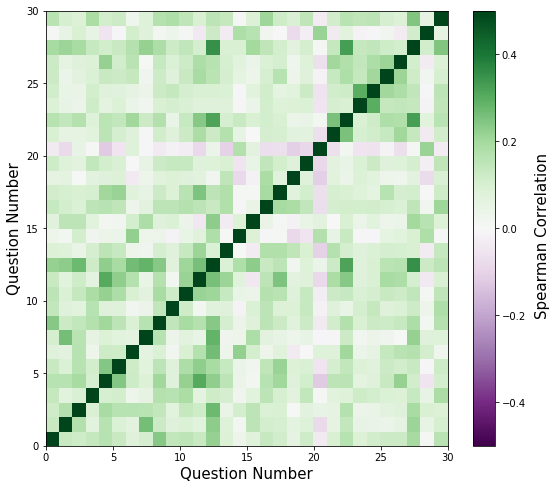

In [57]:
qids = [x for x in e.pre_survey_question_ids if 'a' in x]
z = e.get_pre(unique_students=True)[qids].corr('spearman').values

fig, ax = plt.subplots(figsize=(9, 8))

cbar = ax.pcolormesh(z, cmap='PRGn', vmin=-0.5, vmax=0.5)
# combined.corr('spearman').describe()

fig.colorbar(cbar)
fig.text(0.88, 0.35, 'Spearman Correlation', fontsize=15, rotation=90)

ax.set_xlabel('Question Number', fontsize=15)
ax.set_ylabel('Question Number', fontsize=15)
fig.savefig('precorr.pdf', bbox_inches='tight')

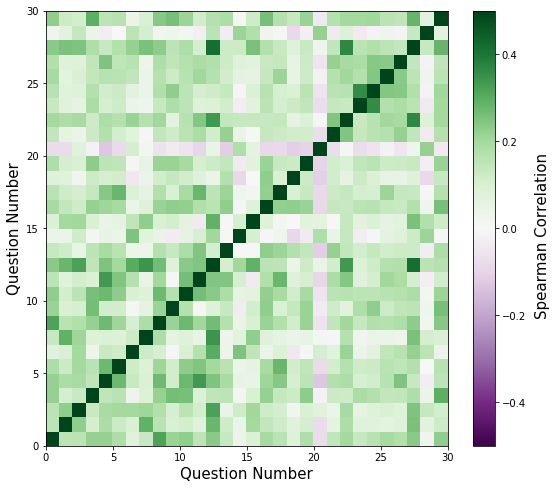

In [58]:
qids = [x for x in e.post_survey_question_ids if 'a' in x]
z = e.get_post(unique_students=True)[qids].corr('spearman').values

fig, ax = plt.subplots(figsize=(9, 8))

cbar = ax.pcolormesh(z, cmap='PRGn', vmin=-0.5, vmax=0.5)
# combined.corr('spearman').describe()

fig.colorbar(cbar)
fig.text(0.88, 0.35, 'Spearman Correlation', fontsize=15, rotation=90)

ax.set_xlabel('Question Number', fontsize=15)
ax.set_ylabel('Question Number', fontsize=15)
fig.savefig('postcorr.pdf', bbox_inches='tight')

# Figure 4: Skree plot for PCA of ECLASS survey

In [131]:
print('presurvey N:', e.get_pre(unique_students=True).shape[0])
print('post survey N:', e.get_post(unique_students=True).shape[0])

presurvey N: 35380
post survey N: 28282


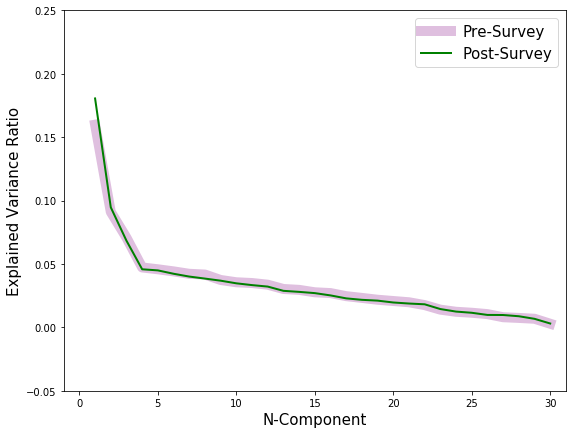

In [39]:
pca_pre = decomposition.PCA()
pca_post = decomposition.PCA()

pca_pre.fit(e.get_pre(unique_students=True)[qids].dropna().values)
pca_post.fit(e.get_post(unique_students=True)[qids].dropna().values)

fig, ax = plt.subplots(figsize=(9, 7))

x = np.arange(1, 31, 1)

ax.plot(x, pca_pre.explained_variance_ratio_, label='Pre-Survey', color='purple', linewidth=10, alpha=0.25)

ax.plot(x, pca_post.explained_variance_ratio_, label='Post-Survey', color='green', linewidth=2)

ax.set_ylabel('Explained Variance Ratio', fontsize=15)

ax.legend(loc='upper right', fontsize=15)

ax.set_xlim(-1, 31)
ax.set_ylim(-0.05, 0.25)
ax.set_xlabel('N-Component', fontsize=15)


fig.savefig('factoranalysis.pdf', bbox_inches='tight')

In [215]:
pca_pre.explained_variance_ratio_.cumsum()

array([0.15981421, 0.25084042, 0.32152627, 0.36876704, 0.41457151,
       0.45872599, 0.50097024, 0.54262554, 0.57999342, 0.61556   ,
       0.65053531, 0.68420093, 0.71447714, 0.74404806, 0.77171693,
       0.79876377, 0.82338007, 0.84661574, 0.86841074, 0.88920119,
       0.90900716, 0.92658355, 0.94056607, 0.95286866, 0.96441072,
       0.97486896, 0.98287469, 0.99032372, 0.99712513, 1.        ])

In [217]:
pca_post.explained_variance_ratio_.cumsum()

array([0.18048415, 0.27512437, 0.34344642, 0.3892522 , 0.43418562,
       0.47646569, 0.51652862, 0.55500168, 0.59182367, 0.6265579 ,
       0.65988775, 0.69205562, 0.7208696 , 0.74886786, 0.77588122,
       0.801092  , 0.82396604, 0.84569402, 0.86678835, 0.88641617,
       0.9052184 , 0.92341862, 0.9378698 , 0.95032388, 0.9618361 ,
       0.97165665, 0.98140919, 0.99019176, 0.99693993, 1.        ])

# Figure 5: Eigenvalues of first three principal components

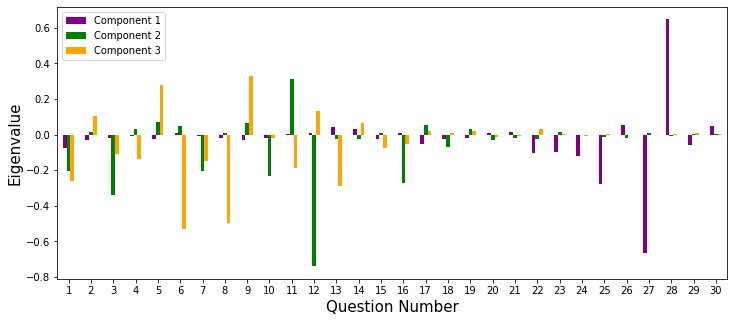

In [37]:
eigenvalues = pd.DataFrame(pca_pre.components_)
fig, ax = plt.subplots(figsize=(12, 5))
eigenvalues[[0, 1, 2]].plot.bar(ax=ax, color=['purple', 'green', 'orange'])
ax.legend(['Component 1', 'Component 2', 'Component 3'])
ax.set_xlabel('Question Number', fontsize=15)
ax.set_ylabel('Eigenvalue', fontsize=15)
ax.set_xticklabels(np.arange(1, 31, 1), rotation=0)
fig.savefig('first3components.pdf', bbox_inches='tight')